In [1]:
import numpy as np
import matplotlib.pyplot as plt
import syris
import tifffile
from tqdm.auto import tqdm
from scipy.ndimage import rotate
from syris.devices.cameras import make_pco_dimax
from joblib import Parallel, delayed
import pandas as pd

In [2]:
%matplotlib inline

In [4]:
volume = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/simulation_phantom_512.npy').astype(np.int8)

padder = int(np.ceil((np.sqrt(2) * volume.shape[1] - volume.shape[1])/2))
padded = np.pad(volume, ((0, 0), (padder, padder), (padder, padder)), mode='constant')

# num_projections = int(np.ceil(np.pi / 2 * att.shape[2]))
num_projections = 120
base_att = 1e-3
flat = 1000  # Flat field intensity
num_flats = 10


In [5]:
import seaborn as sns
from reco_helper import reconstruct_one_slice

In [6]:
slice_number = 127

In [7]:
sino_before = []
for i in tqdm(range(120)):
    img = tifffile.memmap(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/simulation_512/projections_spectrum/{i:03}.tif')
    sino_before.append(img[:, slice_number])
sino_before = np.stack(sino_before, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

In [8]:
reco_before = reconstruct_one_slice(np.pad(sino_before, ((0, 0), (0, 0), (0, 28))))

reconstructing channels:   0%|          | 0/135 [00:00<?, ?it/s]

In [9]:
sino_after = []
for i in tqdm(range(120)):
    img = tifffile.memmap(f'/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/simulation_512/projections_spectrum_processed_acute/{i:03}.tif')
    sino_after.append(img[:, slice_number])
sino_after = np.stack(sino_after, axis=1)

  0%|          | 0/120 [00:00<?, ?it/s]

In [10]:
reco_after = reconstruct_one_slice(np.pad(sino_after, ((0, 0), (0, 0), (0, 28))))
reco_after = np.concatenate([reco_after[[0]], reco_after, reco_after[[-1]]])

reconstructing channels:   0%|          | 0/133 [00:00<?, ?it/s]

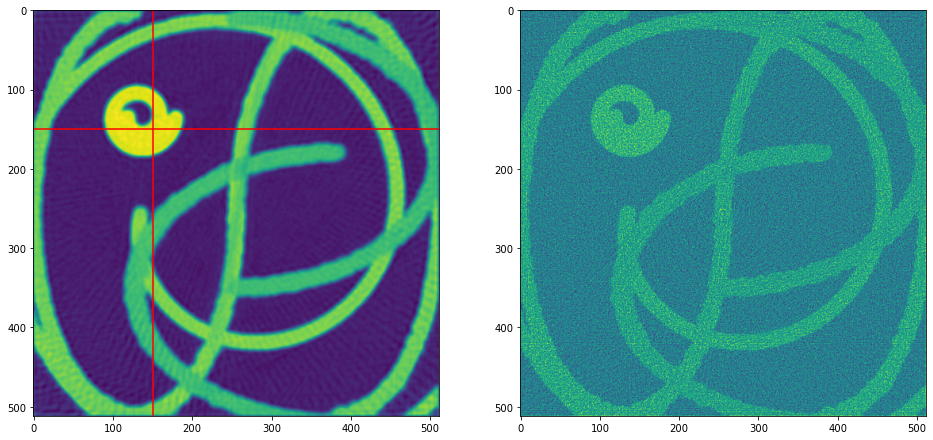

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))
d_x = 150
d_y = 150
ax1.imshow(reco_after[:, 107:-107, 107:-107].sum(0))
ax1.axvline(d_x, c='r')
ax1.axhline(d_y, c='r')

ax2.imshow(reco_before[:, 107:-107, 107:-107].sum(0))


In [17]:
positions = [(290, 150), (280, 130), (280, 250), (350, 300), (150, 150)]

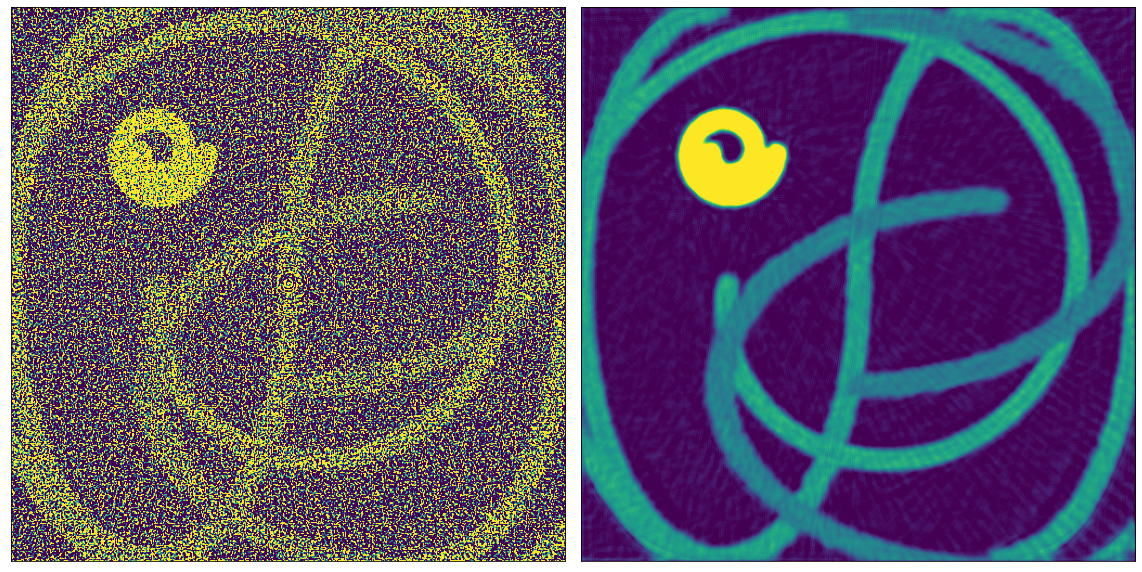

In [51]:
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(reco_after[:, 107:-107, 107:-107][25], vmin=0, vmax=0.03)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(reco_before[:, 107:-107, 107:-107][25], vmin=0, vmax=0.03)
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()
plt.show()

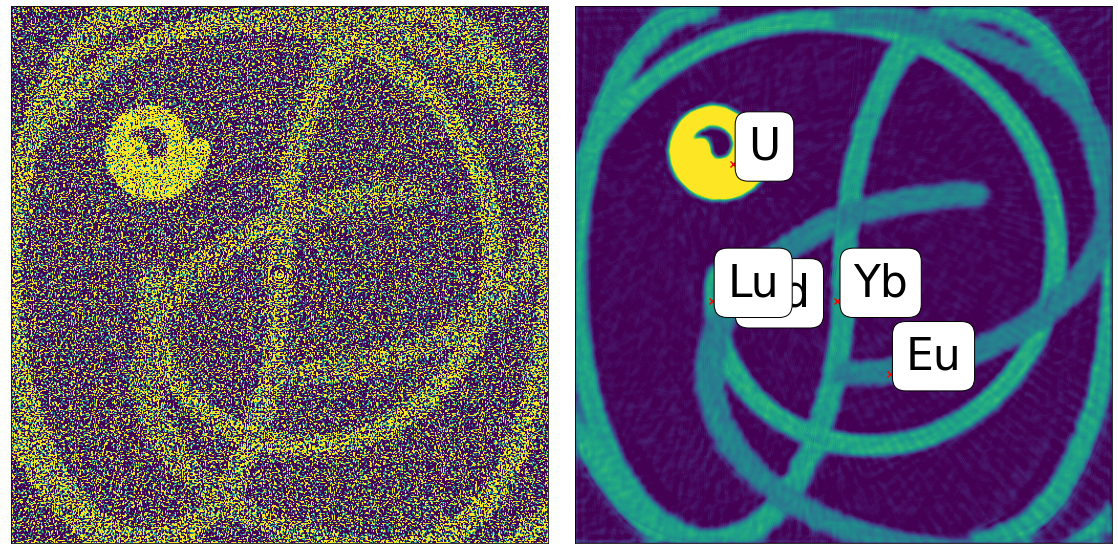

In [82]:
plt.rcParams.update({'font.size': 22})
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(reco_after[:, 107:-107, 107:-107][25], vmin=0, vmax=0.03)
ax1.set_xticks([])
ax1.set_yticks([])
for i, (p_y, p_x) in enumerate(positions):
    mi = materials_index[p_y, p_x]
    c = 'white' if name_map[mi] != 'U' else 'black'
    ax1.text(p_x+15, p_y-5, name_map[mi], c='black', fontdict={'size': 44}, 
             bbox=dict(boxstyle="round",
                   ec='black',
                   fc='white',
                   ))
positions_sc = list(zip(*positions))
ax1.scatter(positions_sc[1], positions_sc[0], c='r', marker='x')
ax2.imshow(reco_before[:, 107:-107, 107:-107][25], vmin=0, vmax=0.03)
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()
plt.savefig('figures/simulation_comparison_40.pdf')
plt.show()

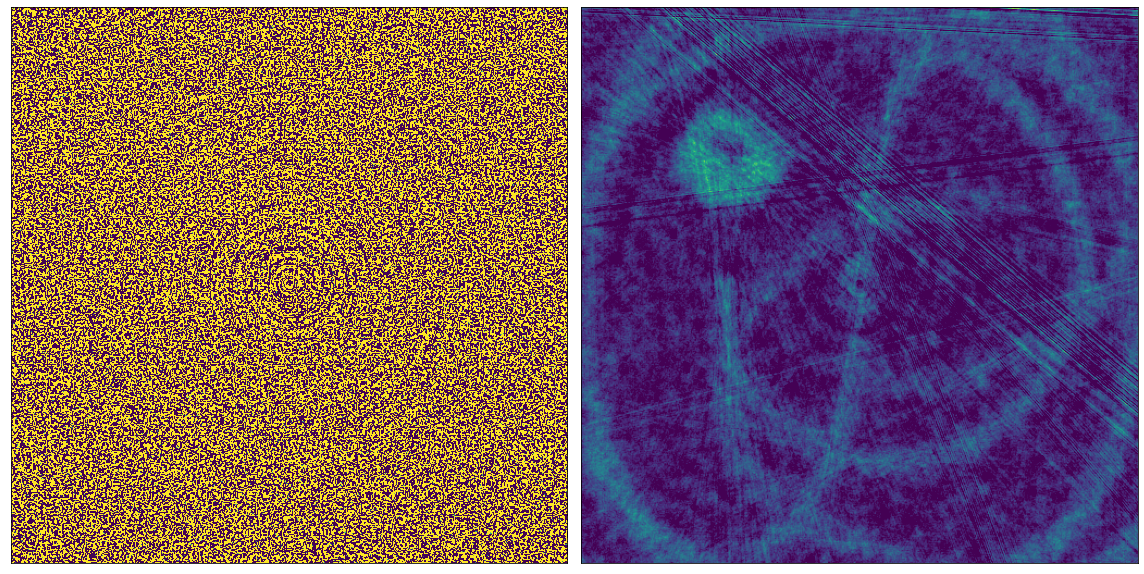

In [18]:
fig, (ax2, ax1) = plt.subplots(ncols=2, figsize=(16, 10))
ax1.imshow(reco_after[:, 107:-107, 107:-107][140-15], vmin=0, vmax=0.01)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(reco_before[:, 107:-107, 107:-107][140-15], vmin=0, vmax=0.01)
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()
plt.show()

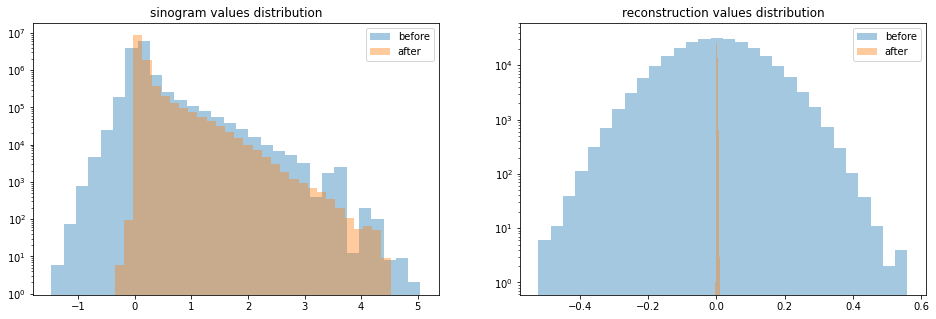

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

ax1.set_title('sinogram values distribution')
ax1.hist(sino_before.flatten(), log=True, alpha=0.4, label='before', bins=30)
ax1.hist(sino_after.flatten(), log=True, alpha=0.4, label='after', bins=30)
ax1.legend()

ax2.set_title('reconstruction values distribution')
ax2.hist(reco_before[:, 107:-107, 107:-107][-20].flatten(), log=True, alpha=0.4, label='before', bins=30)
ax2.hist(reco_after[:, 107:-107, 107:-107][-20].flatten(), log=True, alpha=0.4, label='after', bins=30)
ax2.legend()

fig.show()

In [19]:
import scipy.io

(array([1.0000e+00, 1.4000e+01, 6.7000e+01, 4.0200e+02, 1.8370e+03,
        5.8080e+03, 1.3952e+04, 2.5694e+04, 3.4214e+04, 3.5609e+04,
        2.9888e+04, 2.3067e+04, 1.9480e+04, 1.7975e+04, 1.6627e+04,
        1.3889e+04, 9.8130e+03, 5.7670e+03, 2.9100e+03, 1.5290e+03,
        9.9200e+02, 7.4900e+02, 6.3800e+02, 5.0000e+02, 3.2100e+02,
        2.3900e+02, 1.0600e+02, 3.8000e+01, 1.5000e+01, 3.0000e+00]),
 array([-2.8821090e-03, -2.4831642e-03, -2.0842194e-03, -1.6852745e-03,
        -1.2863296e-03, -8.8738481e-04, -4.8843992e-04, -8.9495101e-05,
         3.0944974e-04,  7.0839457e-04,  1.1073394e-03,  1.5062842e-03,
         1.9052292e-03,  2.3041740e-03,  2.7031188e-03,  3.1020637e-03,
         3.5010085e-03,  3.8999533e-03,  4.2988984e-03,  4.6978430e-03,
         5.0967881e-03,  5.4957327e-03,  5.8946777e-03,  6.2936223e-03,
         6.6925674e-03,  7.0915120e-03,  7.4904570e-03,  7.8894021e-03,
         8.2883462e-03,  8.6872913e-03,  9.0862364e-03], dtype=float32),
 <BarContaine

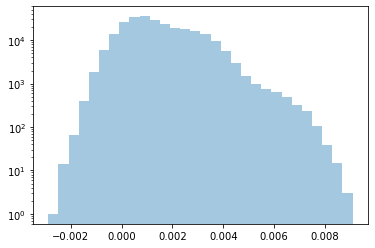

In [61]:
plt.hist(reco_after[:, 107:-107, 107:-107][-20].flatten(), log=True, alpha=0.4, label='after', bins=30)

In [62]:
reco_after[:, 107:-107, 107:-107][-20].min(), reco_after[:, 107:-107, 107:-107][-20].max()

(-0.002882109, 0.009086236)

In [63]:
reco_before[:, 107:-107, 107:-107][-20].min(), reco_before[:, 107:-107, 107:-107][-20].max()

(-0.52069247, 0.5587697)

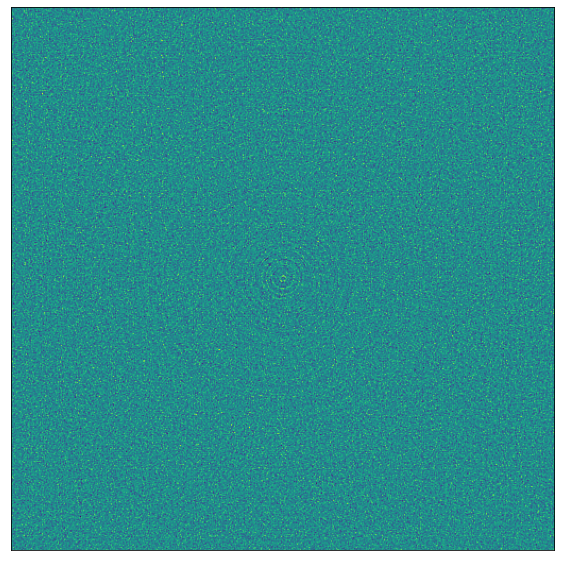

In [64]:
plt.figure(figsize=(10, 10))
plt.imshow(reco_before[:, 107:-107, 107:-107][-20])
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
materials_original = pd.read_csv('materials.txt', header=None, names=['index']+[i for i in range(1, 7)]+[0]+[7, 8], index_col=0)

In [13]:
source_spectrum = pd.read_csv('source_spectrum.txt', header=None, index_col=0, nrows=150, sep='\s+')

In [14]:
materials_index = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/simulation_phantom_512_v2.npy')[slice_number].astype(np.uint8)

In [15]:
name_map = {1: 'Eu', 2: 'Gd', 3: 'Yb', 4: 'Lu', 
 7: 'U', 6: 'I', 0: 'Air', 5: 'U', 8: 'Radium'}

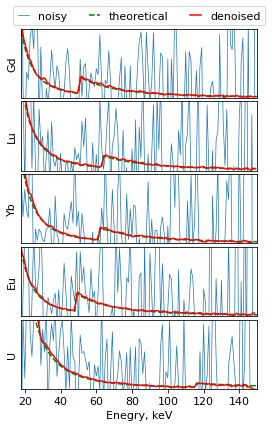

In [34]:
plt.rcParams.update({'font.size': 11})
fig, axes = plt.subplots(figsize=(8/2, 6), nrows=5, sharex=True)
for i, (p_y, p_x) in enumerate(positions):
    axes[i].plot(np.arange(18, 150), reco_before[:, 107:-107, 107:-107][3:, p_y, p_x], lw=0.7, label='noisy')
    mi = materials_index[p_y, p_x]
    axes[i].plot(materials_original[mi].loc[18:150]/600, 'g--', label='theoretical')
    axes[i].plot(np.arange(18, 150)-0.5, reco_after[:, 107:-107, 107:-107][3:, p_y, p_x], 'r-', label='denoised')
    axes[i].set_ylim(0, 0.1)
    axes[i].set_xlim(18, 150)
    axes[i].set_yticks([])
    axes[i].set_ylabel(name_map[mi])

for i in range(len(positions)-1):
    axes[i].tick_params(length=0)
    
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(loc=9, ncol=3, bbox_to_anchor=(0.5, 1.4), handlelength=1, labelspacing=0.1)
axes[-1].set_xlabel('Enegry, keV')
# fig.legend(handles, labels, loc=9, ncol=3)
plt.tight_layout()
plt.subplots_adjust(hspace=.05)
plt.savefig('figures/simulation_denoising_profiles.pdf')
# plt.show()

In [88]:
import scipy.io

In [89]:
k_edge = scipy.io.loadmat('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/material_decomposition/k_edge_acute_low.mat')['tmp']
k_edge_bright = scipy.io.loadmat('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/material_decomposition/k_edge_bright.mat')['tmp']
k_edge_fbp = scipy.io.loadmat('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/material_decomposition/k_edge_fbp_low.mat')['tmp']
phantom = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation/simulation_phantom_512_v2.npy')

In [90]:
from sklearn.metrics import precision_recall_curve, auc, precision_score

In [91]:
phantom[phantom == 7] = 5

In [92]:
from sklearn.preprocessing import label_binarize

In [93]:
k_edge.shape

(6, 512, 512)

In [94]:
ind = np.argsort([1, 2, 3, 4, 0, 5])

In [95]:
k_edge_bright[ind[i]].flatten()

array([1.37712373e-01, 1.50749398e-08, 5.26120990e-08, ...,
       1.56826200e-08, 5.85185897e-02, 8.49470357e-10])

In [96]:
precision_score((phantom[slice_number] == i).flatten(), k_edge_bright[ind[i]].flatten() > 0.5)

1.0

In [97]:
(phantom[slice_number] == i).flatten() == k_edge_bright[ind[i]].flatten()

array([False, False, False, ..., False, False, False])

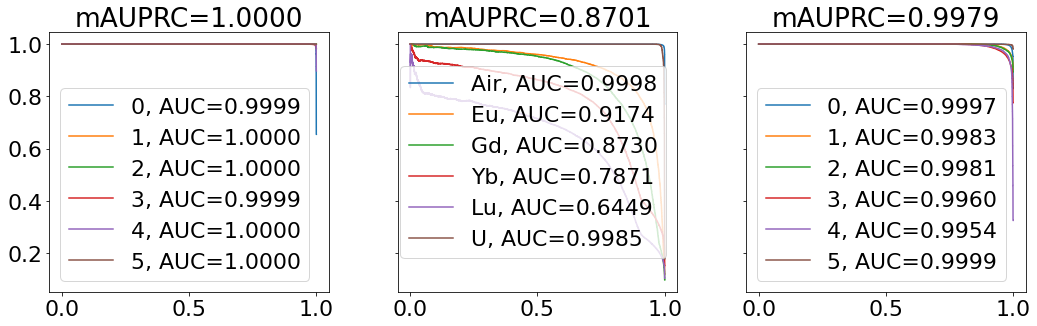

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5), sharey=True)

aucs = []
for i in range(6):
    p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), k_edge_fbp[ind[i]].flatten())
    ax2.plot(r, p, label=f'{name_map[i]}, AUC={auc(r, p):.4f}')
    aucs.append(auc(r, p))
ax2.legend()
ax2.set_title(f'mAUPRC={np.mean(aucs):.4f}')

aucs = []
for i in range(6):
    p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), k_edge_bright[ind[i]].flatten())
    ax1.plot(r, p, label=f'{i}, AUC={auc(r, p):.4f}')
    aucs.append(auc(r, p))
ax1.legend()
ax1.set_title(f'mAUPRC={np.mean(aucs):.4f}')

aucs = []
for i in range(6):
    p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), k_edge[ind[i]].flatten())
    ax3.plot(r, p, label=f'{i}, AUC={auc(r, p):.4f}')
    aucs.append(auc(r, p))
ax3.legend()
ax3.set_title(f'mAUPRC={np.mean(aucs):.4f}')
plt.tight_layout()

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
import seaborn as sns

In [86]:
cm = confusion_matrix((phantom[slice_number]).flatten(), np.argsort(ind)[k_edge_fbp.argmax(0).flatten()])
cm = (cm / cm.sum(1, keepdims=True))

NameError: name 'phantom' is not defined

<AxesSubplot:>

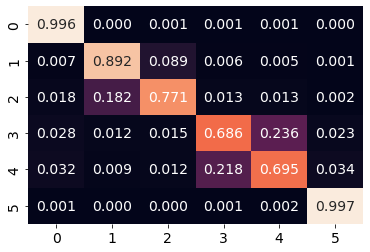

In [85]:
sns.heatmap(cm, annot=True, fmt='.3f', cbar=False)

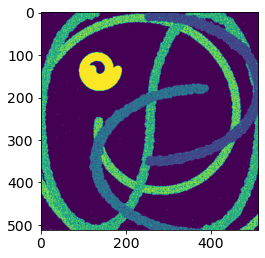

In [86]:
plt.imshow(np.argsort(ind)[k_edge_fbp.argmax(0)])

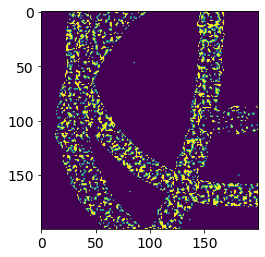

In [87]:
plt.imshow(((phantom[slice_number]) != np.argsort(ind)[k_edge_fbp.argmax(0)])[250:450, 100:300])

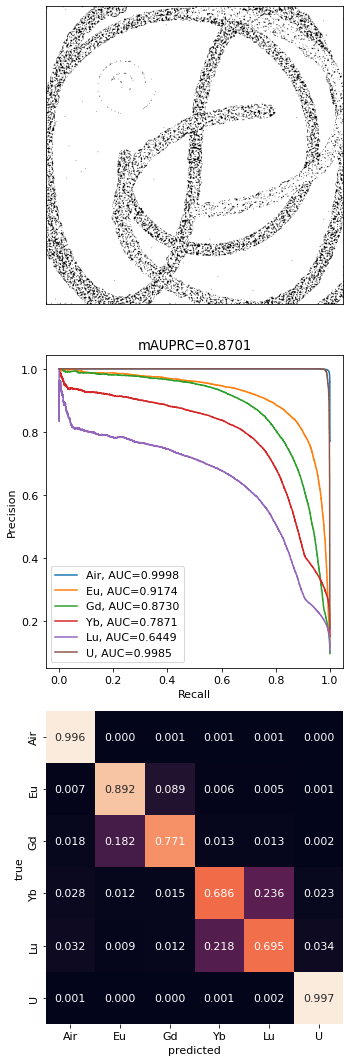

In [99]:
plt.rcParams.update({'font.size': 11})

current_mask = k_edge_fbp

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(5, 15))

ax1.imshow((np.argsort(ind)[current_mask.argmax(0)] == phantom[slice_number]), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])

aucs = []
for i in range(6):
    p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), current_mask[ind[i]].flatten())
    ax2.plot(r, p, label=f'{name_map[i]}, AUC={auc(r, p):.4f}')
    aucs.append(auc(r, p))
ax2.legend()
ax2.set_title(f'mAUPRC={np.mean(aucs):.4f}')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

cm = confusion_matrix((phantom[slice_number]).flatten(), np.argsort(ind)[current_mask.argmax(0).flatten()])
cm = (cm / cm.sum(1, keepdims=True))

sns.heatmap(cm, annot=True, fmt='.3f', cbar=False, ax=ax3)
ax3.set_xticklabels([name_map[i] for i in range(6)])
ax3.set_yticklabels([name_map[i] for i in range(6)])
ax3.set_xlabel('predicted')
ax3.set_ylabel('true')

plt.tight_layout()
plt.show()

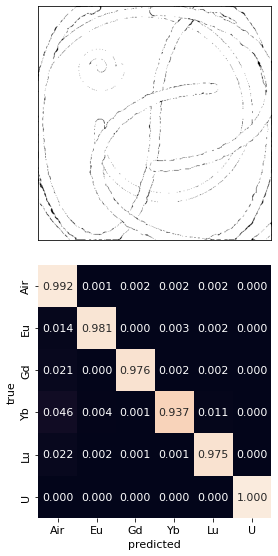

In [102]:
plt.rcParams.update({'font.size': 11})

current_mask = k_edge

fig, (ax1, ax3) = plt.subplots(nrows=2, figsize=(4, 8))

ax1.imshow((np.argsort(ind)[current_mask.argmax(0)] == phantom[slice_number]), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])

# aucs = []
# for i in range(6):
#     p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), current_mask[ind[i]].flatten())
#     ax2.plot(r, p, label=f'{name_map[i]}, AUC={auc(r, p):.4f}')
#     aucs.append(auc(r, p))
# ax2.legend()
# ax2.set_title(f'mAUPRC={np.mean(aucs):.4f}')
# ax2.set_xlabel('Recall')
# ax2.set_ylabel('Precision')

cm = confusion_matrix((phantom[slice_number]).flatten(), np.argsort(ind)[current_mask.argmax(0).flatten()])
cm = (cm / cm.sum(1, keepdims=True))

sns.heatmap(cm, annot=True, fmt='.3f', cbar=False, ax=ax3)
ax3.set_xticklabels([name_map[i] for i in range(6)])
ax3.set_yticklabels([name_map[i] for i in range(6)])
ax3.set_xlabel('predicted')
ax3.set_ylabel('true')

plt.tight_layout()
plt.savefig('figures/comparison_denoised.pdf')
plt.show()

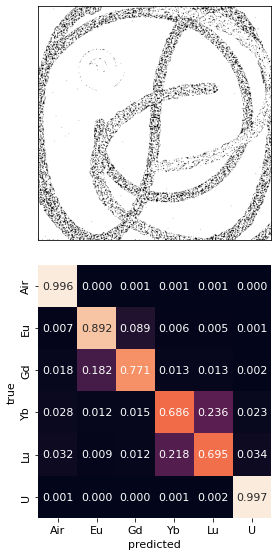

In [103]:
plt.rcParams.update({'font.size': 11})

current_mask = k_edge_fbp

fig, (ax1, ax3) = plt.subplots(nrows=2, figsize=(4, 8))

ax1.imshow((np.argsort(ind)[current_mask.argmax(0)] == phantom[slice_number]), cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])

# aucs = []
# for i in range(6):
#     p,r,t = precision_recall_curve((phantom[slice_number] == i).flatten(), current_mask[ind[i]].flatten())
#     ax2.plot(r, p, label=f'{name_map[i]}, AUC={auc(r, p):.4f}')
#     aucs.append(auc(r, p))
# ax2.legend()
# ax2.set_title(f'mAUPRC={np.mean(aucs):.4f}')
# ax2.set_xlabel('Recall')
# ax2.set_ylabel('Precision')

cm = confusion_matrix((phantom[slice_number]).flatten(), np.argsort(ind)[current_mask.argmax(0).flatten()])
cm = (cm / cm.sum(1, keepdims=True))

sns.heatmap(cm, annot=True, fmt='.3f', cbar=False, ax=ax3)
ax3.set_xticklabels([name_map[i] for i in range(6)])
ax3.set_yticklabels([name_map[i] for i in range(6)])
ax3.set_xlabel('predicted')
ax3.set_ylabel('true')

plt.tight_layout()
plt.savefig('figures/comparison_noisy.pdf')
plt.show()

array([ True,  True,  True, ...,  True,  True,  True])

In [153]:
phantom[slice_number]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
fig, axes = plt.subplots(figsize=(16, 16), nrows=4, sharex=True)
for i, (p_y, p_x) in enumerate(positions):
    axes[i].plot(reco_after[:, 107:-107, 107:-107][3:, p_y, p_x])
    axes[i].plot(reco_before[:, 107:-107, 107:-107][3:, p_y, p_x])
plt.tight_layout()
plt.show()

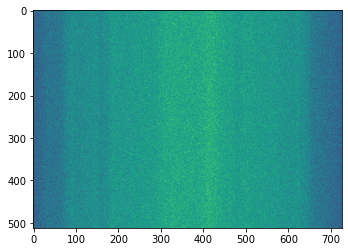

In [133]:
a = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation_512/projections/projection-0100.tif')
plt.imshow(a)

In [190]:
ls /mnt/data/decathlon/Task03_Liver/train/volumes

liver_0.tif    liver_120.tif  liver_3.tif   liver_5.tif   liver_75.tif
liver_1.tif    liver_121.tif  liver_30.tif  liver_50.tif  liver_76.tif
liver_10.tif   liver_122.tif  liver_31.tif  liver_53.tif  liver_77.tif
liver_100.tif  liver_123.tif  liver_32.tif  liver_54.tif  liver_78.tif
liver_101.tif  liver_124.tif  liver_33.tif  liver_55.tif  liver_79.tif
liver_102.tif  liver_125.tif  liver_34.tif  liver_58.tif  liver_8.tif
liver_103.tif  liver_126.tif  liver_35.tif  liver_59.tif  liver_81.tif
liver_105.tif  liver_127.tif  liver_37.tif  liver_6.tif   liver_83.tif
liver_106.tif  liver_128.tif  liver_38.tif  liver_60.tif  liver_84.tif
liver_107.tif  liver_129.tif  liver_39.tif  liver_61.tif  liver_87.tif
liver_108.tif  liver_13.tif   liver_4.tif   liver_62.tif  liver_88.tif
liver_109.tif  liver_14.tif   liver_40.tif  liver_63.tif  liver_89.tif
liver_110.tif  liver_15.tif   liver_41.tif  liver_65.tif  liver_9.tif
liver_111.tif  liver_16.tif   liver_42.tif  liver_66.tif  liver_90.tif
liver_11

In [166]:
v = tifffile.imread('/mnt/data/decathlon/Task02_Heart/train/volumes/la_003.tif')
l = tifffile.imread('/mnt/data/decathlon/Task02_Heart/train/labels/la_003.tif')

In [191]:
v = tifffile.imread('/mnt/data/decathlon/Task03_Liver/train/volumes/liver_0.tif')
l = tifffile.imread('/mnt/data/decathlon/Task03_Liver/train/labels/liver_0.tif')

In [192]:
l.shape

(75, 512, 512)

In [282]:
from skimage.segmentation import mark_boundaries
from skimage.morphology import closing, opening, disk, dilation
from skimage.transform import rescale

In [222]:
from src.callbacks import iou

In [269]:
corr_s = l[i]

In [291]:
corr_s = closing(l[i], disk(8))
corr_s = dilation(corr_s, disk(1))
iou(corr_s, l[i], 2)

array([99.61697752, 95.0706453 ])

In [293]:
corr_s = closing(l[i], disk(25))
corr_s = dilation(corr_s, disk(2))
iou(corr_s, l[i], 2)

array([99.18356813, 90.04793768])

In [295]:
corr_s = closing(l[i], disk(45))
corr_s = dilation(corr_s, disk(5))
iou(corr_s, l[i], 2)

array([98.20450533, 80.44700214])

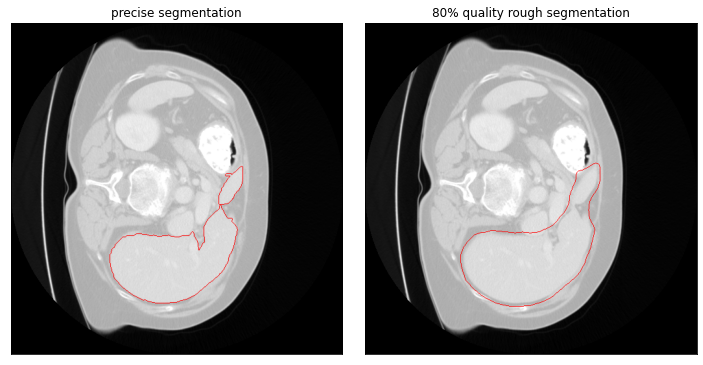

In [296]:
i = 55
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
v_s = mark_boundaries(v[i], l[i], color=(1, 0, 0), )
ax1.imshow(v_s)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('precise segmentation')

v_s = mark_boundaries(v[i], corr_s, color=(1, 0, 0))
ax2.imshow(v_s)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('80% quality rough segmentation')

plt.tight_layout()
plt.show()

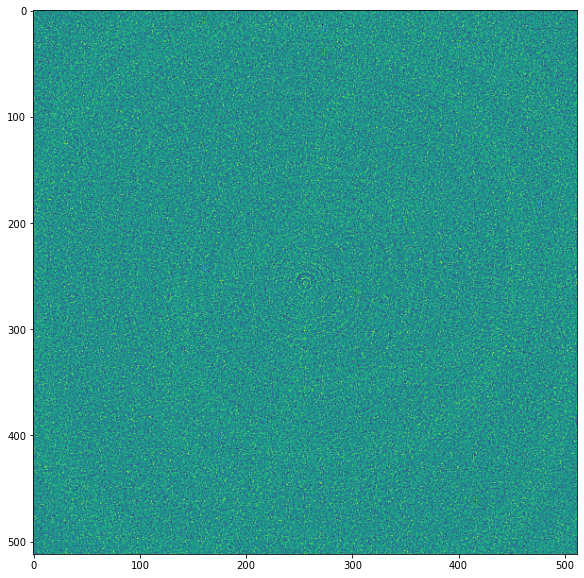

In [36]:
rec_a = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation_512/slices.tif')
plt.figure(figsize=(10, 10))
plt.imshow(rec_a[10])

In [119]:
rec_a = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation_512/slices.tif')

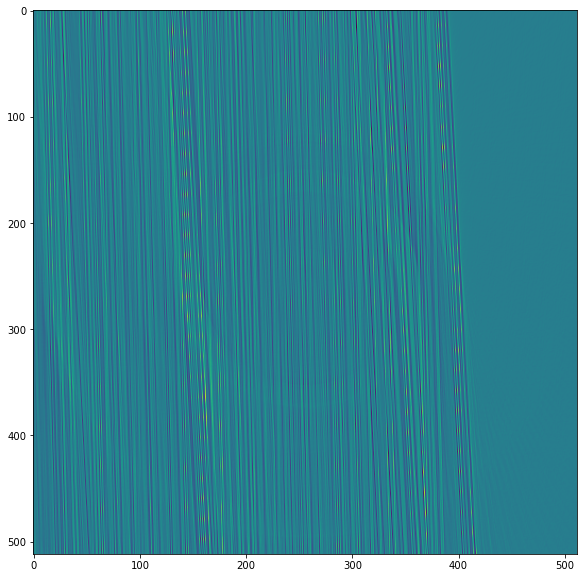

In [121]:
plt.figure(figsize=(10, 10))
plt.imshow(rec_a[10])